# Final Exam
## MAC0459 - 2019/2
### Matheus Tararam de Laurentys - 9793714

## Q1) EDA

### Dataset brief
This dataset contains companies, daparture, arrival, tickets and travel information on flights that arrived or depated in Brazil (or both). 

### Questions
1) What is the distribution of number of international flights that arrive in Brazil by company and airport?

2) What is the difference in international arrival/departure value throughout the years?

3) What are the $CO_2$ emissions of the flights throughout the years (only for brazilian companies)?

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import isnan

In [135]:
def dist_plot(df, col_name, xlim=(0, 4000)):
    name = "Distribution of " + col_name
    ax = df[col_name].value_counts().plot.kde(title=name)
    ax.set_xlim(xlim)    
def bar_plot(df, col_name):
    name = "up to the 10 most significants " + col_name
    ax = df[col_name].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                    figsize=(30,8),
                                    title=name)

In [122]:
data_raw = pd.read_csv("dados_estatisticos_utf.csv", sep=";", decimal=",")

### 1)

The part one of this data vizualization below confirms what someone would expect: there are few companies that host a big number of flights and many companies that host fewer flights.
Part two, however came to me as a surprise. I expected that many more people would arrive in Brazil from the biggest cities in the planet (like New York, Beijing and Tokyo). However the biggest five cities from where people arrive here are Maimi, Buenos Aires, Santiago, Lisboa and Uruguay. I think, maybe, Miami and Lisboa would be home of connecting flights from the US/Canada and Europe/CIS. However, the number of people that arrive from Buenos Aires is greater than the number that arrive from Lisboa. In this sense there would be more people arriving from a singel country than the whole UE, which is contrary to what I exepected.

Company distribution:


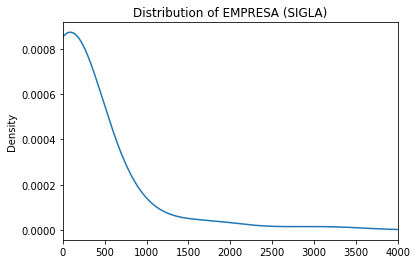

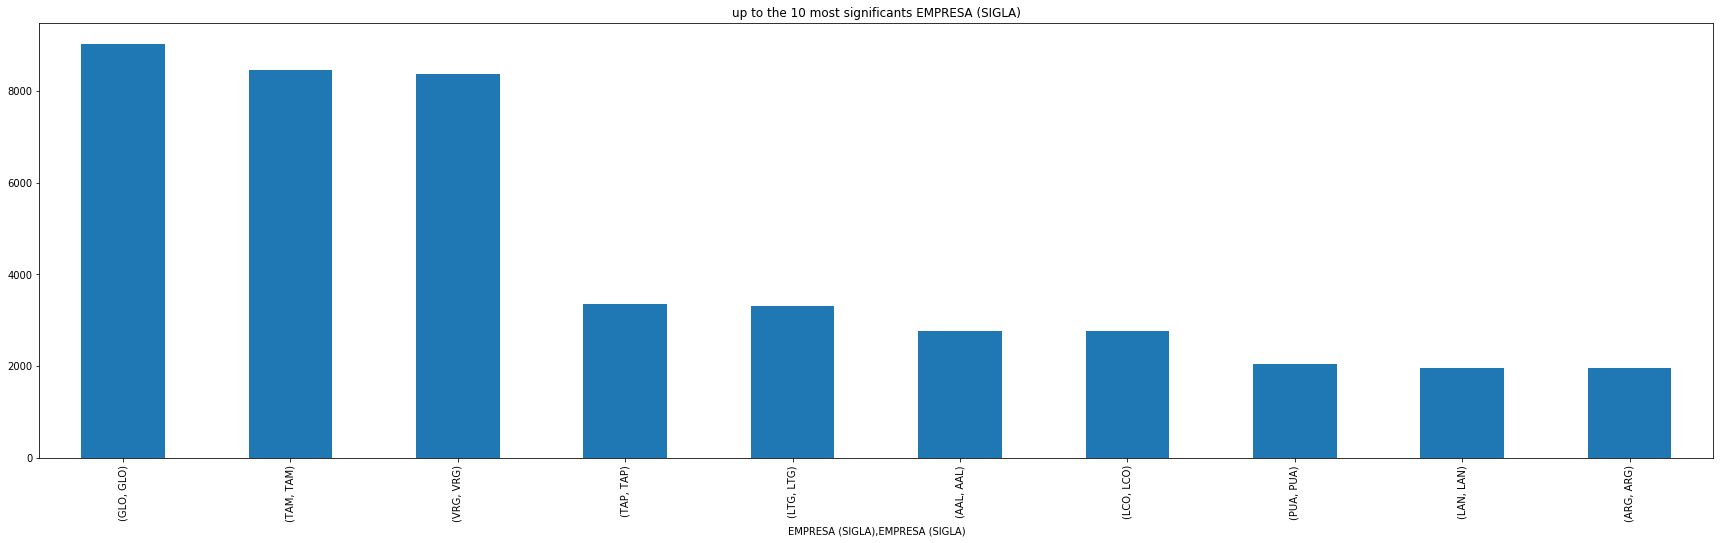

Airport distribution:


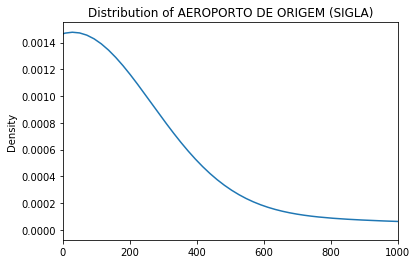

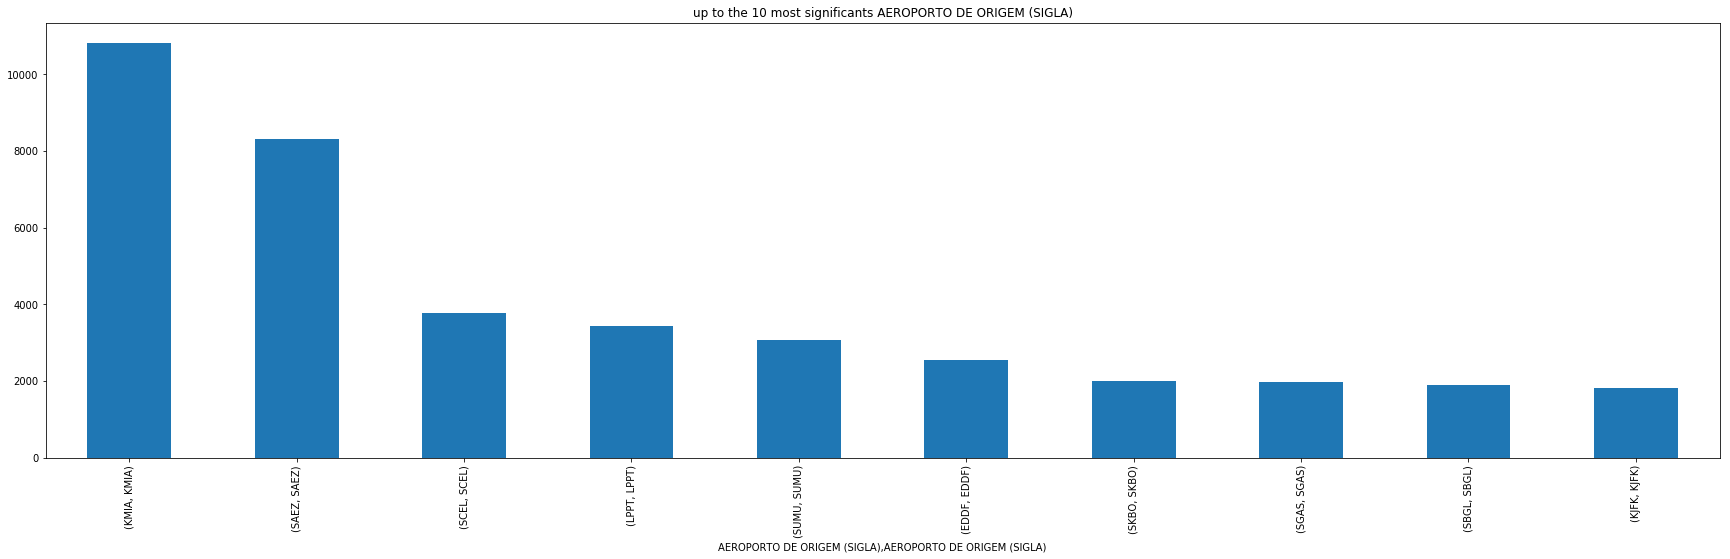

In [136]:
q1_data = data_raw.loc[(data_raw["NATUREZA"] == "Internacional") &
                       (data_raw["AEROPORTO DE DESTINO (PAÍS)"] == "BRASIL")]
q1_by_company = q1_data.groupby("EMPRESA (SIGLA)")
q1_by_airport = q1_data.groupby("AEROPORTO DE ORIGEM (SIGLA)")
print("Company distribution:\n=================================")
dist_plot(q1_by_company, "EMPRESA (SIGLA)")
plt.show()
bar_plot(q1_by_company, "EMPRESA (SIGLA)")
plt.show()
print("Airport distribution:\n=================================")
dist_plot(q1_by_airport, "AEROPORTO DE ORIGEM (SIGLA)", xlim=(0, 1000))
plt.show()
bar_plot(q1_by_airport, "AEROPORTO DE ORIGEM (SIGLA)")
plt.show()

### 2)

The Data Vizualization of this segment is interesting, and it does not go accordingly to what I expected. It might show some data bias but I don't think I can make that relation.

I believe it is normal for a country to have as many arrivals as departures (since most citizens that leave, come back in ashort span of time). If we were to count only the tourism movement, we would have aprroximately 50% of arrivals and 50% of departures. Any difference in this number is due to people arriving in a country and leaving in a different one (if we accept that this dataset covers all flights that arrived or departed in Brazil).
As you can see, from 2000 to 2010, there is a much greater number of people arriving than departing Brazil. I believe it could mean that people moved here, but the number is too high for that and I cannot find a reasonable explanation.

In [63]:
q2_data = data_raw.loc[(data_raw["NATUREZA"] == "Internacional")]
arrivals = {}
departures = {}
for i in range(2000, 2020):
    arrivals[i] = 0
    departures[i] = 0
for _, flight in q2_data.iterrows():
    ano = flight["ANO"]
    if(flight["AEROPORTO DE DESTINO (PAÍS)"] == "BRASIL"):
        arrivals[ano] += 1
    else:
        departures[ano] += 1

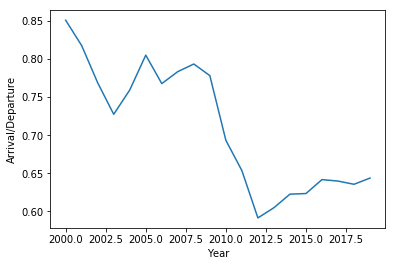

In [68]:
yvals = [arrivals[i]/departures[i] for i in range(2000, 2020)]
xvals = np.arange(2000, 2020)
plt.ylabel("Arrival/Departure")
plt.xlabel("Year")
plt.plot(xvals, yvals)

### 3)

For this segment we will suppose that 90% of the fuel in the airplane is consumed. I am also defining the $CO_2$ emission to be 100% reliant on the amount of fuel used. Since the fuel may vary, I know this is not a accurate representation of reality. I am using a standard I [found](https://www.verifavia.com/greenhouse-gas-verification/fq-how-are-aircraft-co2-emissions-calculated-11.php): ${0.8kg (CO_2)}\over{1L (airplane fuel)}$

The fuel value, unfortunately, only give information about Brazilian companies. What we can say is that the distance traveled with airplanes of Brazilian companies incresed tremendously (about 25% increase from 2000 to 2019). However, if we accept that this change reflects a global tendency, then the emissions might reach a dangerous level very soon.

In [128]:
STRING = "COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS"

def float_fuel(x):
    s = str(q3_data[STRING]).replace(",", ".")
    print(s)
    q3_data[STRING] = float(s)

q3_data = ( 
            data_raw
            .dropna(subset=[STRING])
            .groupby("ANO")
           )
fuels = q3_data[STRING].sum()
for f in fuels: f *= 0.8 * 0.9

<BarContainer object of 20 artists>

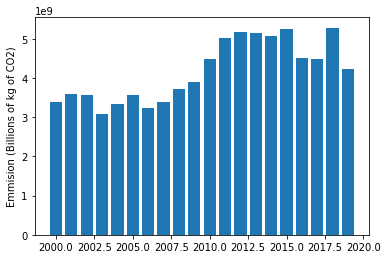

In [133]:
plt.ylabel("Emmision (Billions of kg of CO2)")
plt.bar(xvals, fuels)

## Q3)

Let's rephrase the prompt: 
Show that $d_k(p,q) = (\sum^d_{i=1}c_i|p_i-q_i|^k)^{1\over{k}}$ is a distance function. If $v = q-p$, we can simplify: $d_k(v) = (\sum^d_{i=1}c_i|v_i|^k)^{1\over{k}}$

Therefore, we need to show that: <br>
1) $d_k(a, b) + d_k(b, c) \ge d_k(a, c)$ <br>
2) $d_k(v) = d_k(-v)$ <br>
3) $d_k(v) = 0 \rightarrow v = 0$ <br>
4) $d_k(v) \ge 0$ <br>
1) Let $u = b-a, v = c-b, w = c-a$
$$
d_k(u) + d_k(v) \ge d_k(w) \\
d_k(w)=(\sum^d_{i=1}c_i|w_i|^k)^{1\over{k}} \\
d_k(w)=(\sum^d_{i=1}c_i|v_i+u_i|^k)^{1\over{k}} \\
d_k(w) \leq (\sum^d_{i=1}c_i(v_i^k+u_i^k))^{1\over{k}} \\
d_k(w) \leq (\sum^d_{i=1}c_i(v_i^k+u_i^k))^{1\over{k}} + \sum^d_{i=1}c_i(v_i^k+u_i^k))^{1\over{k}} = 
$$
2)
$$
\text{Since }|v_i| = |-v_i| \\
d_k(v) = (\sum^d_{i=1}c_i|v_i|^k)^{1\over{k}} \\
d_k(v) = (\sum^d_{i=1}c_i|-v_i|^k)^{1\over{k}}
$$
3) [Contradiction] <br>
$$
(\sum^d_{i=1}c_i|v_i|^k)^{1\over{k}} = 0\\
\text{Let }v_j \neq 0\\
\text{(I)}(c_j|v_j|^k + \sum^d_{\substack{i=1 \\ i\neq j}}c_i|v_i|^k)^{1\over{k}} = 0\\
\text{Since }(\sum^d_{\substack{i=1 \\ i\neq j}}c_i|v_i|^k)^{1\over{k}} \ge 0 \text{(proof 4)}\\
\text{Then (I)} > 0
$$
4) <br>
This part is false if we let $c_i < 0$, so let's suppose $c_i \ge 0$:
The n-root of a non-negative number is non-negative. <br>
$|p_i-q_i|^k \ge 0$. <br>
$c|p_i-q_i|^k \ge 0 (\Leftrightarrow c \ge 0$). <br>
Since $d_k$ is a sum of non-negative numbers, it is non-negative.

## Q4)

[0 0 0 1 1 1]
blue


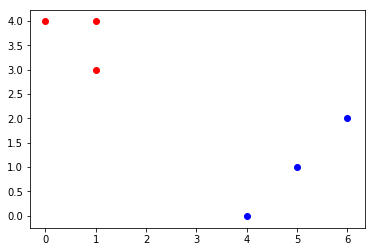

In [146]:
from sklearn.cluster import KMeans

S = np.array([[1,4], [1,3], [0,4], [5,1], [6,2], [4,0]])
x = [1, 1, 0, 5, 6, 4]
y = [4, 3, 4, 1, 2, 0]
k = 2
kmeans = KMeans(n_clusters=k).fit(S)
labels = kmeans.predict(S)
colmap = {0:'red', 1:'blue'}
for i in range (6): plt.scatter(x[i], y[i], color=colmap[kmeans.labels_[i]])

## Q5)

1 - Suppose you build a classifier that answer yes on every possible input. What precision and recall will this classifier achieve?

Precision := $\text{#True Positive}\over \text{#True Positive + #False Positive}$
Recall := $\text{#True Positive}\over \text{#True Positive + #False Negative}$

Since the classifiers always labels 'yes':<br>
Precision = $\text{#True Positive}\over \text{#Samples}$ <br>
Recall = $\text{#True Positive}\over{\text{#True positive}}$ = 1 <br>

Therefore, while de recall will always be 1, the precision can be as bad as required.

2 - Explain what precision and recall are. How do they relate to the ROC curve? Is it better to have too many false positives, or too many false negatives? Explain.

3 - What is cross-validation? How might we pick the right value of k for k-fold cross-validation?

4 - Explain why we have training, test, and validation data sets and how they are used effectively?

5 - Explain why we need so many performance measures for a classifier (precision, recall, F1, accuracy etc) and how they are used in practice?
